Kaggle 데이터를 Colab에서 다운로드하기 위해 Kaggle API 키를 설정합니다.

In [ ]:
import kagglehub

In [ ]:
# kaggle 파일 연결
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hannkh","key":"af98daa5680256e446f9b23f6cc39f53"}'}

In [ ]:
# kaggle API 설정

# kaggle.json -> .kaggle 폴더로 이동
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# 권한 설정(읽기만 가능)
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!kaggle competitions download -c ai03-level1-project

100% 3.91G/3.91G [00:50<00:00, 79.8MB/s]
100% 3.91G/3.91G [00:50<00:00, 83.1MB/s]


In [ ]:
!ls

ai03-level1-project.zip  kaggle.json  sample_data


In [ ]:
# 파일 압축해제
!unzip -q ai03-level1-project.zip

In [ ]:
# matplotlib 캐시 폴더 삭제(자동으로 재성성됨)
import os
import shutil
import matplotlib

cache_dir = matplotlib.get_cachedir()
shutil.rmtree(cache_dir)
print("matplotlib 캐시 삭제 완료 : ", cache_dir)

matplotlib 캐시 삭제 완료 :  /root/.cache/matplotlib


In [ ]:
# 한글폰트 사용 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,859 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and dire

In [ ]:
import matplotlib.font_manager as fm
for f in fm.findSystemFonts():
    if 'Nanum' in f:
        print(f)

/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
/usr/share/fonts/truetype/nanum/NanumSquare_acR.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoR.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothicEcoR.ttf
/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
/usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumBrush.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo-YetHangul.ttf
/usr/sha

# BB박스 시각화 & 데이터 확인

In [ ]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
# device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

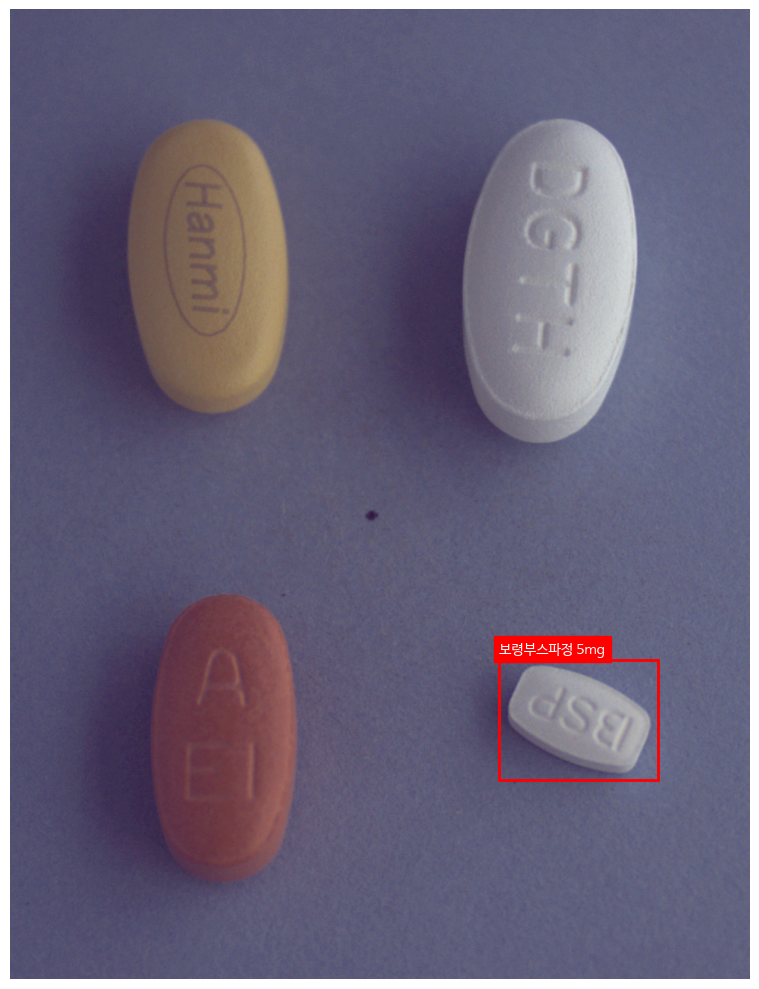

In [ ]:
# 경로 설정
json_path = '/content/train_annotations/K-001900-010224-016551-031705_json/K-001900/K-001900-010224-016551-031705_0_2_0_2_70_000_200.json'
image_root = 'train_images'

# JSON 불러오기
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 이미지 정보 추출
img_info = data['images'][0]
image_filename = img_info['file_name']
image_path = os.path.join(image_root, image_filename)
image_id = img_info['id']

# 이미지 열기
image = Image.open(image_path)

# annotaion과 category 처리
annotations = data['annotations']
categories = {c['id']: c['name'] for c in data['categories']}

# 시각화
fig, ax = plt.subplots(1, figsize=(8, 10))
ax.imshow(image)

# annotation 순회하여 bbox 표시
for ann in annotations:
    if ann['image_id'] != image_id:
        continue

    bbox = ann['bbox']  # [x, y, width, height]
    category_id = ann['category_id']
    label = categories.get(category_id, str(category_id))

    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y -10, label, fontsize=10, color='white', backgroundcolor='red')


plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# 각 데이터셋 이미지 크기 & 개수 추출

import os
import numpy as np
from PIL import Image

# 이미지 경로 설정
train_dir = 'train_images'
test_dir = 'test_images'

# 이미지 크기&개수 저장 함수
def get_image_info(image_dir):
    sizes = []
    total = 0
    for fname in os.listdir(image_dir):
        if fname.endswith('.png'):
            path = os.path.join(image_dir, fname)
            try:
                with Image.open(path) as img:
                    sizes.append(img.size[::-1])    # (height, width) 형태로 저장
                    total += 1
            except:
                print(f"이미지 열기 실패: {fname}")
    if sizes:
        unique_sizes = np.unique(sizes, axis=0)
    else:
        unique_sizes = np.array([])

    return total, unique_sizes


# 고유한 이미지 크기 추출
train_total, train_sizes = get_image_info(train_dir)
test_total, test_sizes = get_image_info(test_dir)

# 출력
print(f"Total images in train: {train_total}")
print("Unique sizes in train:\n", train_sizes)

print(f"\nTotal images in test: {test_total}")
print("Unique sizes in test:\n", test_sizes)




Total images in train: 1489
Unique sizes in train:
 [[1280  976]]

Total images in test: 843
Unique sizes in test:
 [[1280  976]]


#### 정리
- 모든 이미지가 동일한 크기 1280 x 976 사이즈로 정리 됨
- 크기가 통일되어 있어서 모델 학습 시 리사이즈 없이 바로 사용 가능
- annotation 많이 누락됨

# 이미지 전처리

## 누락된 이미지에 해당하는 주석(json) 파일 제거

In [ ]:
import os
import json

# 경로 설정
annotation_root = 'train_annotations'
image_dir = 'train_images'

# 누락된 이미지 목록 저장
missing = []

# 모든 주석 폴더 순회
for folder1 in os.listdir(annotation_root):
    folder1_path = os.path.join(annotation_root, folder1)
    if not os.path.isdir(folder1_path):
        continue

    for folder2 in os.listdir(folder1_path):
        folder2_path = os.path.join(folder1_path, folder2)
        if not os.path.isdir(folder2_path):
            continue

        for filename in os.listdir(folder2_path):
            if filename.endswith('.json'):
                json_path = os.path.join(folder2_path, filename)

                try:
                    with open(json_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)

                    # 해당 json 안에 있는 이미지 파일 이름 가져오기
                    img_file = data['images'][0]['file_name']
                    img_path = os.path.join(image_dir, img_file)

                    if not os.path.isfile(img_path):
                        missing.append({
                            'json_path': json_path,
                            'missing_image': img_file
                        })

                except Exception as e:
                    print(f"[ERROR] {json_path}: {e}")

# 결과 출력
print(f"누락된 이미지에 해당하는 주석 파일 수: {len(missing)}")
print("예시:")
for m in missing[:5]:
    print(f" - {m['missing_image']} (in {m['json_path']})")

❗ 누락된 이미지에 해당하는 주석 파일 수: 0
예시:


In [ ]:
print(f"[CHECK] file_name: {img_file}")
print(f"[CHECK] img_path: {img_path}")
print(f"[CHECK] exists: {os.path.isfile(img_path)}")

[CHECK] file_name: K-003351-003832-035206_0_2_0_2_75_000_200.png
[CHECK] img_path: train_images/K-003351-003832-035206_0_2_0_2_75_000_200.png
[CHECK] exists: True


In [ ]:
import os
from PIL import Image

image_dir = 'train_images'
all_files = os.listdir(image_dir)

broken_files = []
for fname in all_files:
    if not fname.endswith('.png'):
        continue
    fpath = os.path.join(image_dir, fname)
    try:
        img = Image.open(fpath)
        img.verify()  # 손상된 이미지 확인용
    except Exception as e:
        broken_files.append(fname)
        print(f"[BROKEN] {fname}: {e}")

print(f"총 손상된 이미지 수: {len(broken_files)}")


총 손상된 이미지 수: 0


## COCO 포맷 통합 생성

- 여러 개의 JSON 파일(알약 이미지 annotation)을 COCO 포맷 하나의 .json 파일로 통합

-----------------------
1. COCO 포맷 구조 설명

| Key | 설명 |
| --- | --- |
| `images` | 이미지 정보 (id, file_name, width, height 등) |
| `annotations` | 바운딩박스 정보 (image_id, bbox, category_id, annotation_id 등) |
| `categories` | 클래스 정보 (id, name 등) |

### 사전 설정 : json 파일을 coco 형식 json으로 변환

#### 틀린코드

In [ ]:
# import os
# import json
# from tqdm import tqdm


# # 경로 설정
# annotation_root = 'train_annotations'           # 알약 정보가 들어있는 JSON 파일들이 있는 상위 폴더
# image_dir = 'train_images'                      # 이미지 파일들일 들어있는 폴더
# output_json_path = 'train_merge_coco.json'      # 최종으로 만들 COCO 형식 JSON 파일 이름


# # COCO 형식 템플릿      # COCO 포맷의 기본 뼈대를 만듦
# coco = {
#     "images": [],       # 이미지 정보가 들어갈 리스트 (파일명, 크기 등)
#     "annotations": [],  # 객체 정보가 들어갈 리스트 (bbox 등)
#     "categories": []    # 클래스 정보 (알약 이름과 번호 매핑 정보)
# }


# # 카테고리 매핑용 : 클래스 이름을 번호로 바꾸기 위한 딕셔너리와 카운터들
# category_name_to_id = {}    # 알약 이름을 숫자로 바꿔서 저장할 딕셔너리
# category_id_counter = 1     # 클래스 ID 시작값
# annotation_id = 1           # annotation의 고유 ID 시작값
# image_id_counter = 1        # 이미지 고유 ID 시작값


# # 정상 json만 순회  # 2단계 폴더를 순회하면서 JSON 파일만 처리
# for folder1 in os.listdir(annotation_root):     # 1단계 하위 폴더 목록 확인
#     folder1_path = os.path.join(annotation_root, folder1)   # 해당 폴더 경로 완성
#     if not os.path.isdir(folder1_path):             # 폴더가 아니면 건너뜀
#         continue

#     for folder2 in os.listdir(folder1_path):        # 2단계 하위 폴더 순회
#         folder2_path = os.path.join(folder1_path, folder2)
#         if not os.path.isdir(folder2_path):         # 폴더가 아니면 건너뜀
#             continue

#         for filename in os.listdir(folder2_path):       # 그 안의 모든 파일  탐색
#             if not filename.endswith('.json'):          # JSON 파일이 아니면 건너뜀
#                 continue

#             json_path = os.path.join(folder2_path, filename)    # JSON 파일 전체 경로

#             try:
#                 with open(json_path, 'r', encoding='utf-8') as f:   # JSON 파일 열기
#                     data = json.load(f)                             # 내용 읽어서 딕셔너리로 변환

#                 # 이미지 정보 추출
#                 img = data['images'][0]         # 첫 번째 이미지 정보 불러오기
#                 file_name = img['file_name']    # 파일 이름
#                 img_path = os.path.join(image_dir, file_name)   # 이미지 전체 경로

#                 # 이미지 존재 확인(실제로 있는지)
#                 if not os.path.exists(img_path):        # 없으면 건너뜀
#                     continue

#                 width, height = img['width'], img['height']     # 이미지 크기 가져오기

#                 # 이미지 등록
#                 coco['images'].append({
#                     'id': image_id_counter,
#                     'file_name': file_name,
#                     "width": width,
#                     "height": height
#                 })

#                 # 어노테이션 등록(어노테이션 정보 추가)
#                 for ann in data.get('annotations', []):     # 이미지 안의 객체를 하나씩 처리 (annotations 키가 없을 수도 있으므로 .get() 사용)
#                     # 카테고리 정보 가져오기
#                     # 원래 JSON 파일의 categories 리스트를 순회하여 category_id에 맞는 category_name 찾기
#                     cat_name = None
#                     for cat in data.get('categories', []):
#                         if cat['id'] == ann['category_id']:
#                             cat_name = cat['name']
#                             break

#                     if cat_name is None:
#                         print(f"[WARNING] category_id {ann['category_id']}에 해당하는 이름 없음: {json_path}")
#                         continue    # 매칭 실패 시 스킵


#                     # COCO categories에도 중복 없이 추가
#                     if cat_name not in category_name_to_id:
#                         category_name_to_to_id[cat_name] = category_id_counter #  ID 부여
#                         coco['categories'].append({             # COCO category에추가
#                             "id" : category_id_counter,
#                             "name" : cat_name,
#                             "supercategory": "pill"             # 계층 정보 (그냥 'pill' 고정)
#                         })
#                         category_id_counter += 1

#                     # 어노테이션 등록
#                     coco['annotations'].append({
#                         "id": annotation_id,                            # 객체 고유 ID
#                         "image_id": image_id_counter,                   # 어떤 이미지에 있는 객체인지 연결
#                         "category_id": category_name_to_id[cat_name],   # 알약 클래스 숫자 ID
#                         "bbox": ann['bbox'],                            # 바운딩 박스 [x, y, w, h]
#                         "area": ann['bbox'][2] * ann['bbox'][3],        # 바운딩 박스 면적
#                         "iscrowd" : 0                                   # 겹친 객체 아님 (항상 0)
#                     })
#                     annotation_id += 1          # annotation ID 증가

#                 image_id_counter += 1          # 이미지 ID 증가 (다음 이미지로)

#             except Exception as e:              # JSON 처리 중 오류발생 시
#                 print(f"[ERROR] {json_path}: {e}")      # 에러 메시지 출력



# # JSON 저장 : COCO 형식 JSON 파일로 저장
# with open(output_json_path, 'w', encoding='utf-8') as f:
#     json.dump(coco, f, ensure_ascii=False, indent=4)            # 들여쓰기 예쁘게 저장

# # 완료 메시지 출력
# print(f"COCO 통합 완료: {output_json_path}")
# print(f" - 이미지 수: {len(coco['images'])}")
# print(f" - 어노테이션 수: {len(coco['annotations'])}")
# print(f" - 클래스 수: {len(coco['categories'])}")

#### 맞는 코드 : coco 데이셋에 맞게 json 파일 변환

In [ ]:
import os
import json
from tqdm import tqdm


# 경로 설정
annotation_root = 'train_annotations'           # 알약 정보가 들어있는 JSON 파일들이 있는 상위 폴더
image_dir = 'train_images'                      # 이미지 파일들일 들어있는 폴더
output_json_path = 'train_merge_coco.json'      # 최종으로 만들 COCO 형식 JSON 파일 이름


# COCO 형식 템플릿      # COCO 포맷의 기본 뼈대를 만듦
coco = {
    "images": [],       # 이미지 정보가 들어갈 리스트 (파일명, 크기 등)
    "annotations": [],  # 객체 정보가 들어갈 리스트 (bbox 등)
    "categories": []    # 클래스 정보 (알약 이름과 번호 매핑 정보)
}


# 카테고리 매핑용 : 클래스 이름을 번호로 바꾸기 위한 딕셔너리와 카운터들
category_name_to_id = {}    # 알약 이름을 숫자로 바꿔서 저장할 딕셔너리
category_id_counter = 1     # 클래스 ID 시작값
annotation_id = 1           # annotation의 고유 ID 시작값
image_id_counter = 1        # 이미지 고유 ID 시작값


# 정상 json만 순회  # 2단계 폴더를 순회하면서 JSON 파일만 처리
for folder1 in os.listdir(annotation_root):     # 1단계 하위 폴더 목록 확인
    folder1_path = os.path.join(annotation_root, folder1)   # 해당 폴더 경로 완성
    if not os.path.isdir(folder1_path):             # 폴더가 아니면 건너뜀
        continue

    for folder2 in os.listdir(folder1_path):        # 2단계 하위 폴더 순회
        folder2_path = os.path.join(folder1_path, folder2)
        if not os.path.isdir(folder2_path):         # 폴더가 아니면 건너뜀
            continue

        for filename in os.listdir(folder2_path):       # 그 안의 모든 파일  탐색
            if not filename.endswith('.json'):          # JSON 파일이 아니면 건너뜀
                continue

            json_path = os.path.join(folder2_path, filename)    # JSON 파일 전체 경로

            try:
                with open(json_path, 'r', encoding='utf-8') as f:   # JSON 파일 열기
                    data = json.load(f)                             # 내용 읽어서 딕셔너리로 변환

                # 이미지 정보 추출
                img = data['images'][0]         # 첫 번째 이미지 정보 불러오기
                file_name = img['file_name']    # 파일 이름
                img_path = os.path.join(image_dir, file_name)   # 이미지 전체 경로

                # 이미지 존재 확인(실제로 있는지)
                if not os.path.exists(img_path):        # 없으면 건너뜀
                    continue

                width, height = img['width'], img['height']     # 이미지 크기 가져오기

                # 이미지 등록
                coco['images'].append({
                    'id': image_id_counter,
                    'file_name': file_name,
                    "width": width,
                    "height": height
                })

                # 어노테이션 등록(어노테이션 정보 추가)
                for ann in data.get('annotations', []):  # 이미지 안의 객체를 하나씩 처리 (annotations 키가 없을 수도 있으므로 .get() 사용)

                    # 카테고리 정보 가져오기
                    # 원래 JSON 파일의 categories 리스트를 순회하여 category_id에 맞는 category_name 찾기
                    cat_name = None
                    for cat in data.get('categories', []):
                        if cat['id'] == ann['category_id']:
                            cat_name = cat['name']
                            break

                    if cat_name is None:
                        print(f"[WARNING] category_id {ann['category_id']}에 해당하는 이름 없음: {json_path}")
                        continue    # 매칭 실패 시 스킵


                    # COCO categories에도 중복 없이 추가
                    if cat_name not in category_name_to_id:
                        category_name_to_id[cat_name] = category_id_counter #  ID 부여
                        coco['categories'].append({             # COCO category에추가
                            "id" : category_id_counter,
                            "name" : cat_name,
                            "supercategory": "pill"             # 계층 정보 (그냥 'pill' 고정)
                        })
                        category_id_counter += 1

                    # 어노테이션 등록
                    coco['annotations'].append({
                        "id": annotation_id,                            # 객체 고유 ID
                        "image_id": image_id_counter,                   # 어떤 이미지에 있는 객체인지 연결
                        "category_id": category_name_to_id[cat_name],   # 알약 클래스 숫자 ID
                        "bbox": ann['bbox'],                            # 바운딩 박스 [x, y, w, h]
                        "area": ann['bbox'][2] * ann['bbox'][3],        # 바운딩 박스 면적
                        "iscrowd" : 0                                   # 겹친 객체 아님 (항상 0)
                    })
                    annotation_id += 1          # annotation ID 증가

                image_id_counter += 1          # 이미지 ID 증가 (다음 이미지로)

            except Exception as e:              # JSON 처리 중 오류발생 시
                print(f"[ERROR] {json_path}: {e}")      # 에러 메시지 출력



# JSON 저장 : COCO 형식 JSON 파일로 저장
with open(output_json_path, 'w', encoding='utf-8') as f:
    json.dump(coco, f, ensure_ascii=False, indent=4)            # 들여쓰기 예쁘게 저장

# 완료 메시지 출력
print(f"COCO 통합 완료: {output_json_path}")
print(f" - 이미지 수: {len(coco['images'])}")
print(f" - 어노테이션 수: {len(coco['annotations'])}")
print(f" - 클래스 수: {len(coco['categories'])}")

COCO 통합 완료: train_merge_coco.json
 - 이미지 수: 4526
 - 어노테이션 수: 4526
 - 클래스 수: 73


# 학습용 데이터 구성

### ✅ YOLOv8 학습 준비 전체 구조

```

project_folder/
├── images/
│   ├── train/             ← 학습용 이미지들
│   └── val/               ← 검증용 이미지들
├── labels/
│   ├── train/             ← 학습 이미지에 대한 YOLO 포맷 라벨
│   └── val/               ← 검증 이미지에 대한 YOLO 포맷 라벨
├── train_merge_coco.json  ← 원본 COCO 포맷 (변환용)
└── data.yaml              ← YOLOv8 학습 설정 파일

```

### 1. COCO → YOLO 포맷 변환
- YOLOv8은 YOLO 라벨(txt) + data.yal만 있으면 학습 가능
- 변환 스크립트 짜기

#### 변환 스크립트 (COCO JSON  →YOLO txt) + .yaml 파일 생성 및 라벨폴더 생성

##### 3번째 수정: validation 20%로 구성해서 만듦

YOLO.v8는 .yaml 파일로 클래스 및 경로 정보를 인식한다.

In [ ]:
import os
import json
import random
import shutil
from tqdm import tqdm

# -------------------- 사용자 설정 --------------------
coco_json_path = "train_merge_coco.json"  # COCO JSON 경로
image_src_dir = "train_images"              # 원본 이미지가 모여있는 경로 (수정됨)
image_train_dir = "images/train"          # 나눌 train 이미지 경로
image_val_dir = "images/val"              # 나눌 val 이미지 경로
label_train_dir = "labels/train"          # YOLO 라벨 저장 (train)
label_val_dir = "labels/val"              # YOLO 라벨 저장 (val)
yaml_path = "data.yaml"                   # data.yaml 저장 위치
split_ratio = 0.8                         # train:val = 8:2
# ---------------------------------------------------

# 폴더 생성
os.makedirs(image_train_dir, exist_ok=True)
os.makedirs(image_val_dir, exist_ok=True)
os.makedirs(label_train_dir, exist_ok=True)
os.makedirs(label_val_dir, exist_ok=True)

# COCO JSON 로드
with open(coco_json_path, 'r', encoding='utf-8') as f:
    coco = json.load(f)

# 클래스 정보 추출
categories = coco['categories']
category_id_to_name = {cat['id']: cat['name'] for cat in categories}
category_id_to_index = {cat['id']: idx for idx, cat in enumerate(categories)}
class_names = [cat['name'] for cat in categories]

# 이미지 정보
id_to_filename = {img['id']: img['file_name'] for img in coco['images']}
id_to_size = {img['id']: (img['width'], img['height']) for img in coco['images']}

# 어노테이션 그룹화
image_to_annotations = {}
for ann in coco['annotations']:
    image_to_annotations.setdefault(ann['image_id'], []).append(ann)

# 이미지 리스트 셔플 및 분할
image_ids = list(id_to_filename.keys())
random.shuffle(image_ids)
split_idx = int(len(image_ids) * split_ratio)
train_ids = set(image_ids[:split_idx])
val_ids = set(image_ids[split_idx:])

# YOLO txt 생성 및 이미지/라벨 복사
for image_id in tqdm(image_ids):
    file_name = id_to_filename[image_id]
    width, height = id_to_size[image_id]
    anns = image_to_annotations.get(image_id, [])
    yolo_lines = []

    for ann in anns:
        cat_id = ann['category_id']
        # category_id를 0부터 시작하는 class_idx로 변환 (COCO category ID와 YOLO class index 매핑)
        if cat_id not in category_id_to_index:
             print(f"[WARNING] category_id {cat_id} not found in category_id_to_index mapping for image {file_name}. Skipping annotation.")
             continue
        class_idx = category_id_to_index[cat_id]
        x, y, w, h = ann['bbox']
        x_c = (x + w / 2) / width
        y_c = (y + h / 2) / height
        w /= width
        h /= height
        yolo_lines.append(f"{class_idx} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}")

    txt_name = os.path.splitext(file_name)[0] + ".txt"

    # 어디로 보낼지 결정
    if image_id in train_ids:
        img_dst = os.path.join(image_train_dir, file_name)
        label_dst = os.path.join(label_train_dir, txt_name)
    else:
        img_dst = os.path.join(image_val_dir, file_name)
        label_dst = os.path.join(label_val_dir, txt_name)

    # 이미지 복사
    src_img_path = os.path.join(image_src_dir, file_name)
    # 파일 존재 여부 추가 확인
    if not os.path.exists(src_img_path):
        print(f"[WARNING] 이미지 파일이 존재하지 않습니다: {src_img_path}. 해당 이미지의 라벨 생성 및 복사를 건너뜁니다.")
        continue # 파일이 없으면 이 이미지에 대한 처리를 건너뜀

    shutil.copy2(src_img_path, img_dst)

    # 라벨 저장
    # 해당 이미지에 대한 어노테이션이 있을 경우에만 라벨 파일을 생성
    if yolo_lines:
        with open(label_dst, "w") as f:
            f.write("\n".join(yolo_lines))
    else:
         # 어노테이션이 없는 이미지에 대한 라벨 파일은 생성하지 않거나 비워둠
         # YOLOv8은 어노테이션 파일이 없는 이미지를 배경 이미지로 처리할 수 있음.
         pass # 여기서는 라벨 파일 생성을 건너뜀

100%|██████████| 4526/4526 [00:38<00:00, 116.50it/s]


In [ ]:
# data.yaml 생성
# data.yaml 파일의 경로는 /content/ 기준으로 설정함
yaml_content = f"""path: /content/
train: images/train
val: images/val
test: test_images
nc: {len(class_names)}
names: {class_names}
"""

with open(yaml_path, 'w') as f:
    f.write(yaml_content)

# 최종 출력
print("\n COCO → YOLO 변환 완료!")
print(f"클래스 개수 (nc): {len(class_names)}")
print(f"클래스 목록: {class_names}")
print(f"Train 이미지 수: {len(train_ids)}개")
print(f"Val 이미지 수: {len(val_ids)}개")
print(f"data.yaml 생성 위치: {yaml_path}")


✅ COCO → YOLO 변환 완료!
✔️ 클래스 개수 (nc): 73
✔️ 클래스 목록: ['리바로정 4mg', '기넥신에프정(은행엽엑스)(수출용)', '자누메트엑스알서방정 100/1000mg', '노바스크정 5mg', '자누메트정 50/850mg', '리피토정 20mg', '아모잘탄정 5/100mg', '자누비아정 50mg', '플라빅스정 75mg', '엑스포지정 5/160mg', '크레스토정 20mg', '리리카캡슐 150mg', '일양하이트린정 2mg', '동아가바펜틴정 800mg', '조인스정 200mg', '졸로푸트정 100mg', '무코스타정(레바미피드)(비매품)', '타이레놀정500mg', '알드린정', '트루비타정 60mg/병', '뮤테란캡슐 100mg', '비타비백정 100mg/병', '맥시부펜이알정 300mg', '트라젠타정(리나글립틴)', '세비카정 10/40mg', '트라젠타듀오정 2.5/850mg', '트윈스타정 40/5mg', '제미메트서방정 50/1000mg', '써스펜8시간이알서방정 650mg', '리피로우정 20mg', '아토젯정 10/40mg', '낙소졸정 500/20mg', '가바토파정 100mg', '보령부스파정 5mg', '놀텍정 10mg', '리렉스펜정 300mg/PTP', '삼남건조수산화알루미늄겔정', '다보타민큐정 10mg/병', '큐시드정 31.5mg/PTP', '신바로정', '에스원엠프정 20mg', '카나브정 60mg', '타이레놀이알서방정(아세트아미노펜)(수출용)', '메가파워정 90mg/병', '로수젯정10/5밀리그램', '레일라정', '란스톤엘에프디티정 30mg', '마도파정', '로수바미브정 10/20mg', '울트라셋이알서방정', '펠루비정(펠루비프로펜)', '쿠에타핀정 25mg', '비모보정 500/20mg', '케이캡정 50mg', '에빅사정(메만틴염산염)(비매품)', '아토르바정 10mg', '글리아타민연질캡슐', '삐콤씨에프정 618.6mg/병', '콜리네이트연질캡슐 400mg', '뉴로메드정

##### 2번째 수정: validation은 안 만든 코드

In [ ]:
# import os
# import json
# from tqdm import tqdm

# # ---------------------- 사용자 설정 ----------------------
# coco_json_path = "train_merge_coco.json"  # COCO 형식 JSON 경로
# image_root = "images/train"               # 이미지 폴더 경로
# output_label_dir = "labels/train"         # YOLO 라벨(txt) 저장 경로
# # --------------------------------------------------------

# # YOLO 라벨 폴더 만들기
# os.makedirs(output_label_dir, exist_ok=True)

# # COCO JSON 읽기
# with open(coco_json_path, 'r', encoding='utf-8') as f:
#     coco = json.load(f)

# # 이미지 ID -> 파일명 및 크기 매핑
# id_to_filename = {img['id']: img['file_name'] for img in coco['images']}
# id_to_size = {img['id']: (img['width'], img['height']) for img in coco['images']}

# # category_id -> YOLO class index (0부터 시작)
# category_mapping = {cat['id']: idx for idx, cat in enumerate(coco['categories'])}

# # 이미지 ID별 어노테이션 모으기
# image_to_annotations = {}
# for ann in coco['annotations']:
#     image_id = ann['image_id']
#     image_to_annotations.setdefault(image_id, []).append(ann)

# # 변환 시작
# for image_id, file_name in tqdm(id_to_filename.items()):
#     w, h = id_to_size[image_id]
#     label_lines = []

#     for ann in image_to_annotations.get(image_id, []):
#         cat_id = category_mapping[ann['category_id']]
#         x, y, width, height = ann['bbox']

#         # 중심 좌표 및 정규화
#         x_center = (x + width / 2) / w
#         y_center = (y + height / 2) / h
#         width /= w
#         height /= h

#         line = f"{cat_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
#         label_lines.append(line)

#     # YOLO 라벨 파일 저장
#     txt_name = os.path.splitext(file_name)[0] + ".txt"
#     txt_path = os.path.join(output_label_dir, txt_name)
#     with open(txt_path, "w") as f:
#         f.write("\n".join(label_lines))


##### 초기코드 : validation 따로 안만듦

In [ ]:
# # 파일 경로 설정
# coco_json_path = "train_merge_coco.json"        # COCO 형식의 주석 파일(.json)의 경로
# output_label_dir = 'labels/train_images'               # 변환된 YOLO 라벨 (.txt) 파일을 저장할 폴더 경로
# image_root = 'train_images'                     # 실제 이미지들이 들어있는 폴더 경로

# # 라벨 저장 폴더 생성
# os.makedirs(output_label_dir, exist_ok=True)     # labels/trian 이라는 폴더라 없으면 만들어줌
#                                                 # exist_ok=True : 이미 폴더가 있어도 에러 안나게 함

# # COCO JSON 불러오기
# with open(coco_json_path, 'r', encoding='utf-8') as f:      # train_merge_coco.json(COCO 주석 파일)을 열어서 파이썬 딕셔너리 형태로 읽음
#     coco = json.load(f)                         # coco라는 변수에 전체 데이터 저장


# # 이미지 ID -> 파일명 매핑
# id_to_filename = {img['id']: img['file_name'] for img in coco['images']}    # 이미지 고유 ID에 대응되는 파일명을 딕셔너리로 저장
#                                                                         # e.g. {103: 'image1.png', 104: 'image2.png'}
# id_to_size = {img['id']: (img['width'], img['height']) for img in coco['images']}   # 각 이미지 ID에 대응되는 너비/높이 크기 저장
#                                                                         # e.g. {103: (1080, 976)}
#                                                                         # 나중에 YOLO 포맷은 상대 좌표로 바꿔야 하므로 이미지 크기가 필요


# # category_id -> 0부터 시작하는 YOLO용 ID 만들기
# category_mapping = {}
# for i, cat in enumerate(coco['categories']):
#     category_mapping[cat['id']] = i         # YOLO class index는 0부터 시작
# # coco는 클래스 ID가 막 섞여 있을 수 있기 때문에 yolo는 0부터 차례대로 클래스 인덱스를 만들어야 함
# # e.g. coco에서 category_id = 42 --> yolo에선 0


# # 이미지별 어노테이션 그룹핑
# image_to_annotations = {}
# for ann in coco['annotations']:         # annotations : 한 이미지 안에 여러 개의 객체 정보가 들어있음
#     image_id = ann['image_id']          # 어느 이미지에 해당하는 annotation인지
#     image_to_annotations.setdefault(image_id, []).append(ann)
# # 각 이미지 ID마다 어떤 객체들이 있는지 모아서 저장
# # e.g. image_id = 103 : 사람, 약, 병이 있을 수 있음
# # --> [ann1, ann2, ann3] 식으로 저장됨


# # 변환 시작
# for image_id, file_name in tqdm(id_to_filename.items()):        # 전체 이미지 하나하나 반복해서 변환 시작
#                                                             # tqdm : 진행 상태를 보여주는 바(e.g. 10/100)
#     w, h = id_to_size[image_id]         # 이 이미지의 크기 (w, h) 가져오기
#     label_lines = []                    # YOLO 형식의 라벨을 담을 리스트 초기화(YOLO txt 한 줄씩 저장할 리스트를 초기화)

#     for ann in image_to_annotations.get(image_id, []):  # 이 이미지에 포함된 모든 객체(annotation)을 하나씩 반복
#         cat_id = category_mapping[ann['category_id']]   #  YOLO에 맞게 변환된 클래스 ID
#                                                         # COCO의 category ID --> YOLO의 ID로 바꿔줌(0부터 시작)
#         x, y, width, height = ann['bbox']       # COCO는 좌상돤 기준(x, y, 너비, 높이)
#                                                 # COCO에서 각 객체의 위치는 (왼쪽 위 x, y, 너비, 높이) 형식으로 되어 있음

#         # COCO는 (좌상담 x, y, w, h)
#         # YOLO는 (중심 x, y, w, h) -> 정규화
#         x_center = (x + width / 2) / w
#         y_center = (y + height / 2) / h
#         width /= w
#         height /= h
#         # yolo는 중심좌표 기준이라서 변환이 필요
#         # yolo는 0~1 사이 비율이기 때문에 전체 이미지 크기로 나눠줌


#         line = f"{cat_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
#         label_lines.append(line)
#         # YOLO 라벨 한 줄 만들기
#         # 형식 : 클래스 ID 중심 x, 중심 y, W, H

#     # 저장할 txt 파일 경로
#     txt_filename = os.path.splitext(file_name)[0] + '.txt'
#     # 이미지 파일명에서 .png 제거하고 .txt.로 바꿈
#     txt_path = os.path.join(output_label_dir, txt_filename)
#     # labels/train/ 폴더 아래에 저장 경로 생성

#     # txt 저장
#     with open(txt_path, 'w') as f:
#         f.write('\n'.join(label_lines))
#     # YOLO 라벨(txt 파일)을 실제로 저장

## 취소!! (2. data.yaml 별도 생성)
상단에서 train/val 분할과 data.yaml 생성을 동시에 진행

#### # train_merge_coo.json에서 클래스 이름 73개 추출

In [ ]:
# import json

# # COCO json 열기
# with open('train_merge_coco.json', 'r', encoding='utf-8') as f:
#     coco = json.load(f)



# # 카테고리 이름만 추출
# category_names = [cat['name'] for cat in coco['categories']]

# # 출력
# print("nc:", len(category_names))
# print("names:", category_names)

#### data.yaml 파일 생성

In [ ]:
# import yaml
# import os

# # YOLO 캐시 삭제
# print("YOLO 캐시 삭제 중...")
# cache_file = '/content/train_images.cache'
# if os.path.exists(cache_file):
#     os.remove(cache_file)
#     print(f"캐시 파일 삭제 완료: {cache_file}")
# else:
#     print("삭제할 캐시 파일이 없습니다.")


# # 클래스 이름 리스트
# class_names = ['비모보정 500/20mg', '무코스타정(레바미피드)(비매품)', '쎄로켈정 100mg', '가바토파정 100mg', '보령부스파정 5mg', '신바로정', '케이캡정 50mg', '동아가바펜틴정 800mg', '일양하이트린정 2mg', '아질렉트정(라사길린메실산염)', '로수바미브정 10/20mg', '삼남건조수산화알루미늄겔정', '맥시부펜이알정 300mg', '비타비백정 100mg/병', '뮤테란캡슐 100mg', '엑스포지정 5/160mg', '리피토정 20mg', '트라젠타정(리나글립틴)', '기넥신에프정(은행엽엑스)(수출용)', '트윈스타정 40/5mg', '자누메트엑스알서방정 100/1000mg', '크레스토정 20mg', '에빅사정(메만틴염산염)(비매품)', '울트라셋이알서방정', '에스원엠프정 20mg', '자누메트정 50/850mg', '카나브정 60mg', '로수젯정10/5밀리그램', '낙소졸정 500/20mg', '스토가정 10mg', '리바로정 4mg', '쿠에타핀정 25mg', '에어탈정(아세클로페낙)', '트루비타정 60mg/병', '써스펜8시간이알서방정 650mg', '펠루비정(펠루비프로펜)', '라비에트정 20mg', '제미메트서방정 50/1000mg', '세비카정 10/40mg', '트라젠타듀오정 2.5/850mg', '카발린캡슐 25mg', '아모잘탄정 5/100mg', '아토젯정 10/40mg', '오마코연질캡슐(오메가-3-산에틸에스테르90)', '다보타민큐정 10mg/병', '타이레놀정500mg', '큐시드정 31.5mg/PTP', '플라빅스정 75mg', '리렉스펜정 300mg/PTP', '삐콤씨에프정 618.6mg/병', '글리아타민연질캡슐', '종근당글리아티린연질캡슐(콜린알포세레이트)\xa0', '알드린정', '자누비아정 50mg', '리피로우정 20mg', '자이프렉사정 2.5mg', '노바스크정 5mg', '뉴로메드정(옥시라세탐)', '리리카캡슐 150mg', '아토르바정 10mg', '글리틴정(콜린알포세레이트)', '졸로푸트정 100mg', '놀텍정 10mg', '조인스정 200mg', '콜리네이트연질캡슐 400mg', '타이레놀이알서방정(아세트아미노펜)(수출용)', '브린텔릭스정 20mg', '아빌리파이정 10mg', '레일라정', '메가파워정 90mg/병', '렉사프로정 15mg', '란스톤엘에프디티정 30mg', '마도파정']

# # YAML 포맷으로 저장할 내용 구성
# data_yaml = {
#     'path' : '/content', # 이미지와 라벨 폴더의 상위 경로
#     'train' : 'train_images',  # train 이미지 폴더 (path 기준으로 상대 경로)
#     'val' : 'train_images',    # val 이미지 폴더 (path 기준으로 상대 경로)
#     'test' : 'test_images',
#     'nc' : len(class_names),
#     'names' : class_names,
# }

# # YAML 파일로 저장
# with open('data.yaml', 'w', encoding='utf-8') as f:
#     yaml.dump(data_yaml, f, allow_unicode=True)

# print("data.yaml 파일 생성 완료")



## 3. 학습 시작 (YOLOv8s)



In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")
results = model.train(
    data="data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    name="yolov8m-custom")
# pre_result = model.predict(source='train_images', save=True)

100%|██████████| 49.7M/49.7M [00:00<00:00, 372MB/s]


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m-custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

train: Scanning /content/labels/train... 1458 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1458/1458 [00:21<00:00, 68.30it/s]

train: New cache created: /content/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 89.9±18.1 MB/s, size: 1780.9 KB)


val: Scanning /content/labels/val... 716 images, 0 backgrounds, 1 corrupt: 100%|██████████| 716/716 [00:12<00:00, 57.82it/s]

val: /content/images/val/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]
val: New cache created: /content/labels/val.cache


Plotting labels to runs/detect/yolov8m-custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00013, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m-custom
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.21G      1.524      9.483      1.495         33        640:   1%|          | 1/92 [00:02<03:32,  2.34s/it]


100%|██████████| 755k/755k [00:00<00:00, 89.5MB/s]
       1/20      6.27G     0.8308      4.999       1.13          5        640: 100%|██████████| 92/92 [01:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:25<00:00,  1.10s/it]


                   all        715        715      0.562      0.265      0.127      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.19G     0.4819      3.084     0.9098          1        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:24<00:00,  1.07s/it]


                   all        715        715      0.387      0.581      0.235      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      7.26G      0.452      2.472     0.8899          4        640: 100%|██████████| 92/92 [01:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.05it/s]


                   all        715        715      0.391      0.597      0.308      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.33G     0.4355      2.223     0.8838          5        640: 100%|██████████| 92/92 [01:07<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.08it/s]


                   all        715        715      0.347      0.688      0.322      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       7.4G     0.4146      1.995     0.8733          2        640: 100%|██████████| 92/92 [01:06<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.15it/s]


                   all        715        715      0.316      0.708      0.323      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.59G     0.3971      1.892     0.8713          5        640: 100%|██████████| 92/92 [01:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]


                   all        715        715      0.324      0.733      0.357      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.66G     0.3832       1.78     0.8663          2        640: 100%|██████████| 92/92 [01:07<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]

                   all        715        715      0.344      0.742      0.323      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.73G     0.3654      1.685      0.851          4        640: 100%|██████████| 92/92 [01:07<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]


                   all        715        715      0.267      0.821       0.36      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.79G     0.3548      1.643       0.86          3        640: 100%|██████████| 92/92 [01:06<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]


                   all        715        715       0.29      0.797      0.368      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.86G     0.3554      1.637     0.8554          6        640: 100%|██████████| 92/92 [01:07<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]


                   all        715        715      0.264       0.83      0.338      0.326
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.93G     0.2788       1.54     0.8107          2        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.15it/s]


                   all        715        715      0.256      0.848      0.332      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.07G     0.2639      1.478     0.8046          2        640: 100%|██████████| 92/92 [01:06<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]


                   all        715        715      0.244      0.922      0.346      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.21G     0.2602      1.456      0.796          2        640: 100%|██████████| 92/92 [01:06<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.07it/s]

                   all        715        715      0.258      0.901      0.343      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.37G     0.2488       1.41     0.8025          2        640: 100%|██████████| 92/92 [01:06<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.06it/s]


                   all        715        715      0.262      0.906      0.334      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.51G     0.2387      1.377      0.803          2        640: 100%|██████████| 92/92 [01:07<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]


                   all        715        715      0.261      0.918      0.337      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.64G     0.2365      1.328     0.7969          2        640: 100%|██████████| 92/92 [01:07<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]


                   all        715        715      0.265      0.913      0.358       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.65G     0.2312      1.302     0.7928          2        640: 100%|██████████| 92/92 [01:07<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:22<00:00,  1.04it/s]


                   all        715        715      0.266       0.91      0.351      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.72G     0.2185      1.284     0.7876          2        640: 100%|██████████| 92/92 [01:07<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:21<00:00,  1.08it/s]


                   all        715        715      0.267      0.912      0.343      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.79G       0.21      1.258     0.7975          2        640: 100%|██████████| 92/92 [01:07<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.10it/s]


                   all        715        715       0.27      0.926      0.345      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.85G     0.2083      1.244     0.7946          2        640: 100%|██████████| 92/92 [01:06<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:20<00:00,  1.14it/s]


                   all        715        715      0.267      0.928      0.349      0.344

20 epochs completed in 0.514 hours.
Optimizer stripped from runs/detect/yolov8m-custom/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/yolov8m-custom/weights/best.pt, 52.1MB

Validating runs/detect/yolov8m-custom/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,882,027 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:27<00:00,  1.17s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: 

                   all        715        715       0.29      0.797      0.367      0.354
              리바로정 4mg         16         16      0.259          1      0.384      0.382
    기넥신에프정(은행엽엑스)(수출용)         73         73      0.231          1      0.234      0.231
 자누메트엑스알서방정 100/1000mg         12         12          1          0      0.286      0.279
             노바스크정 5mg          6          6      0.114          1      0.195      0.195
        자누메트정 50/850mg         10         10      0.192          1      0.219      0.219
             리피토정 20mg         24         24      0.335          1      0.428      0.428
         아모잘탄정 5/100mg         10         10      0.218          1      0.248      0.239
            자누비아정 50mg         12         12      0.209          1      0.212      0.212
            플라빅스정 75mg         24         24      0.357      0.875      0.389      0.369
         엑스포지정 5/160mg         16         16      0.291      0.938      0.344      0.344
            크레스토정 20m

In [ ]:
# from ultralytics import YOLO

# # 모델 불러오기((YOLOv8n, YOLOv8s, YOLOv8m, YOLOv8l 등 중 선택 가능)
# model = YOLO('yolov8s.pt')      # 소형모델 사용

# # 학습시작
# model.train(
#     data='/content/data.yaml',   # data.yaml의 경로
#     epochs=20,
#     imgsz=640,      # 이미지 크기 (기본값 640)
#     batch=16,       # 배치 사이즈 (colab이라면 8~16)
#     name='yolov8-custom',   # 결과 저장 폴더 이름
# )

##4. 모델 추론 테스트

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/yolov8m-custom/weights/best.pt')
results = model.predict(
    source='train_images',
    save=True
    )


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1489 /content/train_images/K-001900-010224-016551-031705_0_2_0_2_70_000_200.png: 640x512 (no detections), 42.9ms
image 2/1489 /content/train_images/K-001900-010224-016551-031705_0_2_0_2_75_000_200.png: 640x512 1 동아가바펜틴정 800mg, 28.5ms
image 3/1489 /content/train_images/K-001900-010224-016551-031705_0_2_0_2_90_000_200.png: 640x512 (no detections), 28.5ms
image 4/1489 /content/train_images/K-001900-010224-016551-033009_0_2_0_2_70_000_200.png: 640x

## 5. 시각화 확인

## 6. 예측결과 csv로 저장

### 1. 예측결과 csv로 저장

In [ ]:
import pandas as pd
import os

# 예측 결과 객체에서 박스 좌표 등 추출
all_predictions = []

for result in results:
    boxes = result.boxes
    names = result.names
    img_path = result.path

    for box in boxes:
        cls_id = int(box.cls.cpu().numpy()[0])            # 클래스 ID
        cls_name = names[cls_id]                          # 클래스 이름
        conf = float(box.conf.cpu().numpy()[0])           # 신뢰도
        x1, y1, x2, y2 = box.xyxy.cpu().numpy()[0]        # 좌표

        all_predictions.append({
            "image_path": img_path,
            "class_id": cls_id,
            "class_name": cls_name,
            "confidence": conf,
            "x1": x1,
            "y1": y1,
            "x2": x2,
            "y2": y2
        })

# CSV로 저장
df = pd.DataFrame(all_predictions)
csv_path = "/content/yolov8m_predictions.csv"
df.to_csv(csv_path, index=False)

print(f"예측 결과 저장 완료: {csv_path}")


예측 결과 저장 완료: /content/yolov8m_predictions.csv


### 2. 모델 성능 평가 지표 저장 :mAP, Precision, Recall 등 사용

In [ ]:
metrics = model.val()

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 97.2±24.4 MB/s, size: 1693.4 KB)


val: Scanning /content/labels/val.cache... 716 images, 0 backgrounds, 1 corrupt: 100%|██████████| 716/716 [00:00<?, ?it/s]

val: /content/images/val/K-003351-016262-018357_0_2_0_2_75_000_200.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     6.8878]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:31<00:00,  1.43it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:496: UserWarning:

                   all        715        715       0.29      0.797      0.367      0.354
              리바로정 4mg         16         16      0.259          1      0.384      0.382
    기넥신에프정(은행엽엑스)(수출용)         73         73      0.231          1      0.234      0.231
 자누메트엑스알서방정 100/1000mg         12         12          1          0      0.286      0.279
             노바스크정 5mg          6          6      0.114          1      0.193      0.193
        자누메트정 50/850mg         10         10      0.192          1      0.219      0.219
             리피토정 20mg         24         24      0.335          1      0.428      0.428
         아모잘탄정 5/100mg         10         10      0.218          1      0.248      0.239
            자누비아정 50mg         12         12      0.209          1      0.216      0.216
            플라빅스정 75mg         24         24      0.359      0.875      0.395       0.38
         엑스포지정 5/160mg         16         16      0.291      0.938      0.342      0.342
            크레스토정 20m

In [ ]:
# 성능지표 텍스트로 출력
# metrics 객체는 model.val() 실행 후에 생성됨

# 평균 Precision은 metrics.box.mp
# 평균 Recall은 metrics.box.mr로 접근해야 함

eval_result_text = f"""

=== 모델 성능 평가 결과 ===
mAP50 : {float(metrics.box.map50):.3f}
mAP75 : {float(metrics.box.map75):.3f}
mAP : {float(metrics.box.map):.3f}
Precision: {float(metrics.box.mp):.3f}
Recall: {float(metrics.box.mr):.3f}
box_f1 : {float(metrics.box.f1.mean()):.3f}
"""
# box_f1은 metrics.box.f1 속성으로 접근 가능
    # .mean()을 사용하여 평균값 계산


print(eval_result_text)



# 텍스트 파일로 저장
with open("/content/yolov8m_eval_metrics.txt", "w")as f:
    f.write(eval_result_text)

print("성능 평가 결과 저장 완료: /content/yolov8m_eval_metrics.txt")



=== 모델 성능 평가 결과 ===
mAP50 : 0.367
mAP75 : 0.367
mAP : 0.354
Precision: 0.290
Recall: 0.797
box_f1 : 0.340         

성능 평가 결과 저장 완료: /content/yolov8m_eval_metrics.txt


# 지표 해석

## 성능 지표 전체 해석

```
=== 모델 성능 평가 결과 ===
mAP50 : 0.367
mAP75 : 0.367
mAP : 0.354
Precision: 0.290
Recall: 0.797
box_f1 : 0.340

```

---

### 1. `mAP50`: 0.367

- **정의**: IOU(교차 영역 비율)가 50% 이상일 때, 모델이 **정확하게 객체를 탐지한 평균 성능**
- **해석**: 0.367이면, 36.7%의 정확도로 정답 박스와 50% 이상 겹치는 예측을 잘 함
- **기준 IOU가 0.5일 때의 성능**

---

### 2. `mAP75`: 0.367

- **정의**: IOU가 75% 이상일 때 탐지 성공률
- **해석**: 75% 이상 겹친 상태에서도 예측을 거의 비슷한 수준(36.7%)으로 잘 함
- **박스를 더 정확히 맞춘 비율**

---

### 3. `mAP`: 0.354

- **정의**: `mAP@[.50:.95]`, 즉 IOU를 0.50~0.95까지 0.05 간격으로 늘려가며 평균을 낸 성능
- **해석**: IOU 조건을 점점 엄격하게 했을 때도 평균적으로 35.4% 수준의 탐지 정확도를 보여줌
- **전체적인 탐지 성능 평균 지표**

---

### 4. `Precision`: 0.290

- **정의**: 모델이 객체라고 정의한 것 중에 진짜 객체인 비율
- **해석**: 예측한 것 중 **29%만 진짜**
- **예측한 것 중에 꽤 많은 수가 틀렸다는 신호**

---

### 5. `Recall`: 0.797

- **정의**: 실제 객체 중에 모델이 **얼마나 잘 찾아냈는가**의 비율
- **해석**: 실제로 있는 객체 중 **약 80%는 잘 찾아냈음**
- 탐지는 잘 했지만, 정답률은 떨어짐

---

### 6. `box_f1`: 0.340

- **정의**: Precision과 Recall의 조화 평균 (균형 지표)
- **해석**: 전체적으로 정답과 오답의 균형을 보면, **34% 수준의 탐지 품질**
- 일반적으로 0.6~0.8 이상이면 우수하다고 봄

---

## 종합 해석

| 항목 | 해석 |
| --- | --- |
| **탐지는 잘 함** (Recall 0.797) → 실제 객체를 거의 놓치지 않음 |  |
| **정확도는 낮음** (Precision 0.290) → 엉뚱한 것도 많이 예측함 |  |
| **F1 0.340** → 전체적인 탐지 품질은 아직 낮은 수준 |  |
| **mAP50~75 36% 전후** → 중간 정도 정확도지만 개선 필요 |  |

---

## 개선 시 확인

1. **클래스 불균형 체크**: 어떤 클래스만 잘 잡고, 어떤 클래스는 못 잡을 수도 있음.
2. **데이터 라벨 오류 확인**: COCO→YOLO 변환이 제대로 됐는지 확인.
3. **이미지 수 더 늘리기**: 훈련 데이터 80% 기준으로 부족할 수 있음.
4. **모델 더 큰 걸로 시도**: `YOLOv8l.pt`로 시도해볼 수도 있음.